In [2]:
!pip install transformers torch torchvision torchaudio


^C


In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:
data={"text":["I love this product , it is amazing!",
             "This is the worst experience ever",
             "I am very happy with the service",
             "I am disappointed and angry!",
             "Not bad, could be better",
             "Absolutely fantastic, highly recommended!",
             "Terrible quality, waste of money"
             ]}
df=pd.DataFrame(data)
print(df)

                                        text
0       I love this product , it is amazing!
1          This is the worst experience ever
2           I am very happy with the service
3               I am disappointed and angry!
4                   Not bad, could be better
5  Absolutely fantastic, highly recommended!
6           Terrible quality, waste of money


In [ ]:
df["sentiment"]=df["text"].apply(lambda x: sentiment_analyzer(x)[0]["label"])
df["confidence"]=df["text"].apply(lambda x:sentiment_analyzer(x)[0]["score"])
print(df)

                                        text sentiment  confidence
0       I love this product , it is amazing!  POSITIVE    0.999887
1          This is the worst experience ever  NEGATIVE    0.999774
2           I am very happy with the service  POSITIVE    0.999866
3               I am disappointed and angry!  NEGATIVE    0.999612
4                   Not bad, could be better  POSITIVE    0.978924
5  Absolutely fantastic, highly recommended!  POSITIVE    0.999881
6           Terrible quality, waste of money  NEGATIVE    0.999816


In [ ]:
df["sentiment_value"]=df["sentiment"].map({
    "POSITIVE":1,
    "NEGATIVE":0
})
print(df)

                                        text sentiment  confidence  \
0       I love this product , it is amazing!  POSITIVE    0.999887   
1          This is the worst experience ever  NEGATIVE    0.999774   
2           I am very happy with the service  POSITIVE    0.999866   
3               I am disappointed and angry!  NEGATIVE    0.999612   
4                   Not bad, could be better  POSITIVE    0.978924   
5  Absolutely fantastic, highly recommended!  POSITIVE    0.999881   
6           Terrible quality, waste of money  NEGATIVE    0.999816   

   sentiment_value  
0                1  
1                0  
2                1  
3                0  
4                1  
5                1  
6                0  


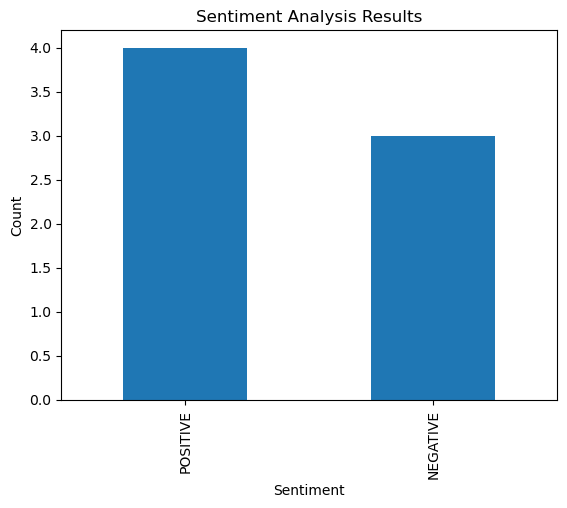

In [ ]:
import matplotlib.pyplot as plt
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
while True:
    text=input("Enter text(type 'exit' to quit):")
    if text.lower()=='exit':
        break
    result=sentiment_analyzer(text)[0]
    print(f"Sentiment:{result['label']} | Confidence: {result['score']:.2f}")

Enter text(type 'exit' to quit): amazing


Sentiment:POSITIVE | Confidence: 1.00


Enter text(type 'exit' to quit): worst


Sentiment:NEGATIVE | Confidence: 1.00


Enter text(type 'exit' to quit): not ok


Sentiment:NEGATIVE | Confidence: 1.00


Enter text(type 'exit' to quit): exit


In [ ]:
import streamlit as st
from transformers import pipeline

# Page config
st.set_page_config(
    page_title="Sentiment Analysis App",
    page_icon="💬",
    layout="centered"
)

# Load model (cached for performance)
@st.cache_resource
def load_model():
    return pipeline(
        "sentiment-analysis",
        model="distilbert-base-uncased-finetuned-sst-2-english"
    )

sentiment_analyzer = load_model()

# App title
st.title("💬 Sentiment Analysis Web App")
st.write("Analyze sentiment of text using NLP and Transformer models.")

# User input
user_input = st.text_area("Enter your text here:")

if st.button("Analyze Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        result = sentiment_analyzer(user_input)[0]

        sentiment = result["label"]
        confidence = result["score"]

        if sentiment == "POSITIVE":
            st.success(f"😊 Sentiment: {sentiment}")
        else:
            st.error(f"😞 Sentiment: {sentiment}")

        st.write(f"**Confidence Score:** {confidence:.2f}")
